#GA LA Data Science 7 - Homework 3

For this homework, we will be using the library tweepy to pull data from the Twitter API, 
and then do language detection on it. That is, you will build a classifier to predict what language a given tweet is, based only on its text.

Start by installing tweepy with pip: ```sudo pip install tweepy```

Be sure to consult the documentation at http://tweepy.readthedocs.org/en/v3.3.0/index.html 
read early, read often. **NOTE:** Tweepy is among the most popular Twitter+Python libraries and is recommended by Twitter. However, it lacks complete documentation, e.g. the documentation is missing the Stream class.

For the early parts, you can also look at this blog post: 
http://adilmoujahid.com/posts/2014/07/twitter-analytics/

In order to access Twitter Streaming API, we need to get 4 pieces of information from Twitter: 
    API key, 
    API secret, 
    Access token, and 
    Access token secret. 
Follow the steps below to get all 4 elements:

- Create a twitter account if you do not already have one.
- Go to https://apps.twitter.com/ and log in with your twitter credentials.
- Click "Create New App"
- Fill out the form, agree to the terms, and click "Create your Twitter application"
- In the next page, click on "Keys and Access Tokens" tab, and copy your "API Key" and "API Secret".
- Scroll down and click "Create my access token", and copy your "Access Token" and "Access Token Secret".
- Double-check and ensure you copied the entire tokens rather than just part of them.

Now that that's all set up, let's get get on with the fun stuff!

In [59]:
# To start, let's just get a basic listener set up. All we want to do here is see 
# a stream of data from Twitter. 
# If this works, you should see a bunch of json's in your output console. 
# (If you see anything else -- such as 3-digit numbers or nothing at all -- then it's time to debug.)
import requests
import random
import time
import urllib
import hmac
from hashlib import sha1
import base64
import collections
import pandas as pd
import numpy as np

#Variables that contains the user credentials to access Twitter API 
api_key = b"yGrCEinj1esitqUKnluIVRGFH"
api_secret = b"a4loFJuuob0Ct63O97xxD4vwFqsj5FCTdkEOZsQIYY90FgruPM"


'''
auth_token = api_key + b':' + api_secret
get_b_token = base64.b64encode(auth_token).decode()
p = requests.post('https://api.twitter.com/oauth2/token', headers={'Authorization': 'Basic ' + get_b_token, 'Content-Type': 'application/x-www-form-urlencoded;charset=UTF-8'}, data='grant_type=client_credentials')
'''
bearer_token = 'AAAAAAAAAAAAAAAAAAAAANUxgwAAAAAA03BiCesaCR%2B1WqSd6e6i5oDfI8M%3DV5wVG3HWNovQTSjim1QZRWAHSkV2OYX4cux3n15rltfgYZldUh'


search_url = "https://api.twitter.com/1.1/search/tweets.json"
search_query = {
        "q": "#paris",
        "count": "100",
        "result_type": "mixed"
}

langs = ['au', 'eu', 'en', 'es', 'mx', 'fr', 'zh', 'tw', 'sv', 'su', 'de', 'ro', 'ru', 'sc', 'sa', 'pt', 'uk', 'it']
tags  = ['yolo', 'vive', 'us', 'earth', 'planet', 'math', 'lang', 'hund', 'dog', 'france', 'da', 'peace', 'love', 'family']

df = []

for lang in langs:
    for tag in tags:
        sq = search_query.copy()
        sq['q'] = '#' + tag
        sq['lang'] = lang
        url = search_url + '?' + urllib.parse.urlencode(sq)

        g = requests.get(url, headers={'Authorization': 'Bearer ' + bearer_token})
        statuses = g.json().get('statuses')
        try:
            for status in statuses:
                df.append({'TEXT': status.get('text'), 'LANG': status.get('lang')})
        except:
            print('whoops... not iterable!')
    

d = pd.DataFrame(df)
print(d['LANG'].unique())
d.to_csv('./tweets.csv')

['en' 'es' 'fr' 'zh' 'sv' 'de' 'und' 'ru' 'tl' 'pt' 'uk' 'it']


In [ ]:
# Now that that's working, let's filter our data. 
# This part is actually pretty easy. 
# Change the on_data method of ListenerParser to extract only the 'text' and 'language' fields, if present.
# We also want to be able to retrieve a set number of results, so I have set a max_results parameter 
# in the constructor. Use that in your edit of on_data to make the object only retrieve up to 
# max_results many results. 

# This is a listener that will extract the data we are interested in and print to stdout
# Note this class is the same class as in the last example. Except now, in on_data we
#    are processing the tweets instead of just printing them!
class ListenerParser(StreamListener):
    
    def __init__(self, max_results): 
        super(ListenerParser, self).__init__()
        
        self.texts = []   # List of tweet messages
        self.langs = []   # List of tweet languages
        
        if max_results:
            self.max_results = max_results
        else: 
            self.max_results = float("inf")
    
    def on_data(self, data):
        if len(l.texts) >= self.max_results:
            return False   # stop collecting data
        try:
            # Converts current tweet from JSON to Python data structures
            data = json.loads(data)
            
            # Look inside the 'data' variable, or read the Twitter docs
            text = 'YOUR ANSWER HERE'   # Text of the tweet (from 'data')
            lang = 'YOUR ANSWER HERE'   # Language of the tweet (from 'data')
            
            # Print status every 500 tweets loaded
            if not (len(l.texts) % 500): 
                print(str(len(l.texts)) + ' tweets loaded!')
            
            # Add current text/lang to tweet/language lists
            self.texts.append(text)
            self.langs.append(lang)
        except: 
            pass
        return True

    def on_error(self, status):
        print('ERROR: ', status)

# Now let's get some data! 
# start with 10 results for testing. 
# once testing is done, increase to 10,000
l = ListenerParser(max_results=10) 

auth = OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

stream = Stream(auth, listener = l)
stream.sample()

In [138]:
# Check and make sure that you have the same number of texts as tweets. 
import pandas as pd
d = pd.read_csv('../my-data/tweets.csv')

tr_df = []

ts_df = []
i = 0
for row in d.values:
    if i % 5 == 0:
        ts_df.append({'LANG': row[1], 'TEXT': row[2]})
    else:
        tr_df.append({'LANG': row[1], 'TEXT': row[2]})
        
    i += 1
    if i==100:
        break
    


In [ ]:
# Awesome, now let's see if we can predict the language using only the text. 
# Use scikit-learn to split your data into train and test sets, 
# do the feature extraction on the text, 
# build two different classifiers: Logistic Regression and Naive Bayes,
# and evaluate the results. 

# First, feature extraction. 
# Questions: do words or chars make more sense as features here? and what kind of ngram-range? 


I'm going to use words to determine language. I think chars will have a higher rate of collision across mutliple languages.

In [139]:
# Next, split the data into train and test sets. 
tr_df = pd.DataFrame(tr_df)
ts_df = pd.DataFrame(ts_df)
tr_df.fillna('', inplace=True)
ts_df.fillna('', inplace=True)
print(tr_df) #training sets
print(ts_df) #test sets

   LANG                                               TEXT
0    en  Another mental Saturday night. It will be near...
1    en  Sometimes you take bedtime selfies w yer hat s...
2    en  Currently just changed my entire outfit includ...
3    en  I just like listening to @SpotifyAU's top 100 ...
4    en             @CrankThatFrank so basically...\n#YOLO
5    en  YEMEN IN BLOOD AND FIRE\nhttps://t.co/vmpXbb8G...
6    en  @Braunger In good news, we built some truly FA...
7    en  S W A G #withfilter #school #swag #cool #yolo ...
8    en  RT @PanicCompanion: Hope &amp; Help For Your N...
9    en  I show up early more often for baseball games ...
10   en  Watching 30 Rock instead of getting ready for ...
11   en      I used #yolo in a tweet. What is this 2012??😂
12   en    Fucking quitters #yolo  https://t.co/vm9asL2bwZ
13   en  Just got this email... #yolo #dontstopliving #...
14   en  @Sarahandsnicker And I'm an hour from home. #YOLO
15   en  RT @itskayladenise: my first time tryna put on.

ValueError: x and y must have same first dimension

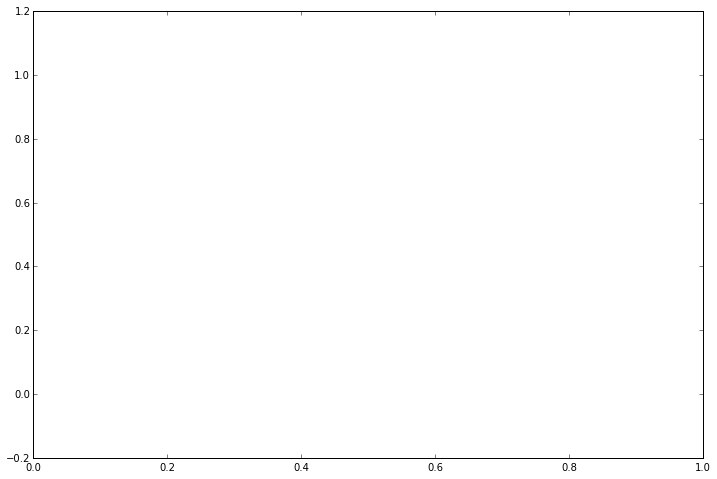

In [142]:
# Next, some classifiers. 
# Start with logistic regression. 
# print a full classification report after you have trained the classifier and made predictions. 

lang_map = {'au': 0.0, 'eu': 0.1, 'en': 0.2, 'es': 0.3, 'mx': 0.4, 'fr': 0.5, 'zh': 0.6, 'tw': 0.7, 'sv': 0.8, 'su': 0.9, 'de': 0.10, 
            'ro': 0.11, 'ru': 0.12, 'sc': 0.13, 'sa': 0.14, 'pt': 0.15, 'uk': 0.16, 'it': 0.17}

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(ngram_range=(1, 2))
x = count_vect.fit_transform(tr_df.TEXT)

tr_df['LANG_KEY'] = tr_df['LANG'].map(lang_map)
y = tr_df['LANG_KEY']

from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y)


%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV

fig, axes = plt.subplots(1,1, figsize=(12, 8))
axes.set_ylim((-0.2, 1.2))
plt.plot(xtrain, ytrain, 'o')

In [130]:
# Now do the same with multinomial naive bayes 
from sklearn.naive_bayes import MultinomialNB

print("MultinomialNB:")
clf = MultinomialNB().fit(np.nan_to_num(xtrain), np.nan_to_num(ytrain))
accuracy_report(clf)

MultinomialNB:


ValueError: Unknown label type: array([ 0.15,  0.12,  0.1 , ...,  0.17,  0.2 ,  0.2 ])

In [ ]:
# Wow, that's some very high-dimensional data. 
# To estimate, if we had 150,000 dimensions * 10,000 datapoints * 4 bytes each (assuming we use int32 or float32; would be 8 byes if we are using int64 or float64)
# the dense matrix would take up ~6 GB of memory. 
# 
# your laptop probably doesn't have that. 
# 
# To deal with this dimensionality problem, we have several options. Among them: 
# 1. Reduce dimensionality and convert to a dense array 
# -- use a dimensionality reduction algorithm (but we haven't covered that yet, so that's not really an option)
# -- or set a max_features limit in scikit-learn's CountVectorizer
# 2. Don't use this classifier 
# 
# For now, I'm going to go with 2. 
# My reasoning is: We already have several classifiers that are very good with high-dimensional data. 
# Even if we pared our data down to, say, 5000 dimensions using a max_features limit, 
# we would be throwing away a ton of information, but it would still be pretty tedious 
# to compute. 
# 
# You are free to choose whichever approach you want. 
# 
# But as a freebie, I'm going to choose a different classifier that does support sparse input 
# to use as a third option. This will be a sneak preview of support vector machines.
# We will use sklearn's LinearSVC rather than SVC, because it is much faster to train (linear vs. quadratic or even cubic time)
# and we don't need any of the extra functionality offered by a nonlinear svm that we could get using SVC.

In [3]:
from sklearn.svm import LinearSVC

"""YOUR ANSWER HERE"""

'YOUR ANSWER HERE'

In [ ]:
# With a bit more preprocessing, this score could be substantially higher. 
# 
# Moving on, our data is less-than-ideal in a few ways: 
# 1. Several of the class labels occur only 1 or 2 times; 
# 2. There are only 10,000 datapoints
# 3. We have done almost no preprocessing (of text, or of data after vectorization)
# 
# From here on, this problem set is an open question: How can you improve on these base scores? 
# What's the best you can produce here? 
# 
# Go at it. And record your results in this notebook. 
# 
# Notes: 
# To determine your best score, use a cross validated score with 5 folds. 
# You are still only allowed to use the text. No meta-data! 